# Upload the Packages we will use for this chapter
* numpy for numeric arrays
* scipy for simple linear models in scipy
* matplotlib and seaborn for graphing
* pandas for multi-type dataframes
* sklearn's linear models for simple and multiple regression
* stats models for simple and multiple regression with frequentist testing
* sklearn's preprocessing

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import linear_model
sns.set_style('white')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn import preprocessing

/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Import the Boston data

In [2]:
d = pd.read_csv('/Users/abbiepopa/Documents/datascience_projects/machine_learning_group/data/Boston.csv')

d.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Simple Linear Regression

## Performed with sklearn

In [3]:
reg = linear_model.LinearRegression()
reg.fit(np.transpose(np.matrix(d.lstat.values)), np.transpose(np.matrix(d.medv.values)))
pred = reg.predict(np.transpose(np.matrix(d.lstat.values)))


print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
print('R^2: \n', reg.score(np.transpose(np.matrix(d.lstat.values)), np.transpose(np.matrix(d.medv.values))))

Coefficients: 
 [[-0.95004935]]
Intercept: 
 [ 34.55384088]
R^2: 
 0.544146297586


## Performed with scipy

In [4]:
slope, intercept, r_value, p_value, std_err = stats.linregress(list(d.lstat.values), list(d.medv.values))

print('Coefficients: \n', slope)
print('Intercept: \n', intercept)
print('R^2: \n', r_value**2)

Coefficients: 
 -0.950049353758
Intercept: 
 34.5538408794
R^2: 
 0.544146297586


## Show the scattered data, predicted line, and 95% confidence interval with seaborn

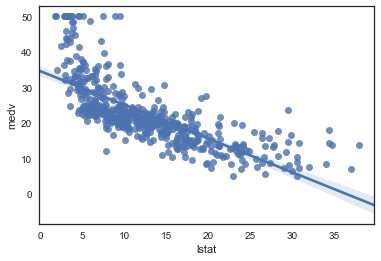

In [5]:
sns.regplot(d.lstat, d.medv, ci = 95)

## Plot residuals versus the predicted to find reducible error

### Not studentized residuals

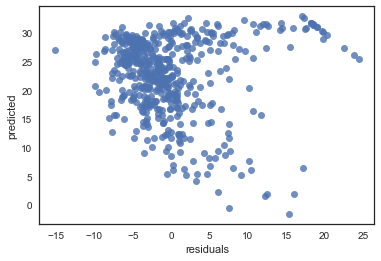

In [6]:
foo = pd.DataFrame(index = np.arange(len(pred)), columns = ['predicted', 'up', 'down'])

foo['predicted'] = pred
foo['up'] = pred + 1.96*std_err
foo['down'] = pred - 1.96*std_err

foo['actual'] = np.transpose(np.matrix(d.medv.values))

foo['residuals'] = foo['actual'] - foo['predicted']

sns.regplot(foo.residuals, foo.predicted, fit_reg = False)

### studentized residuals

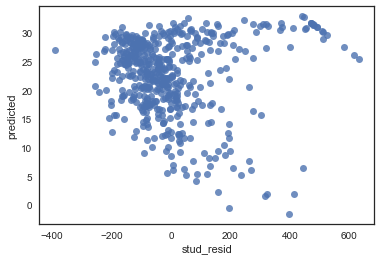

In [7]:
foo['stud_resid'] = foo['residuals']/std_err

sns.regplot(foo.stud_resid, foo.predicted, fit_reg = False)

## Leverage

### compute and plot

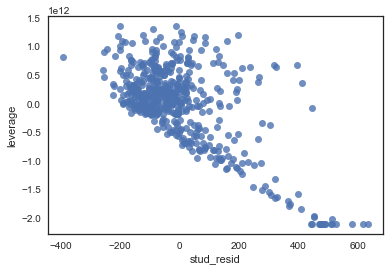

In [8]:
sq_dev = foo.actual - np.mean(foo.actual)
sum_sq_dev = sum(sq_dev)
foo['leverage'] = (1/506) + sq_dev/sum_sq_dev

sns.regplot(foo.stud_resid, foo.leverage, fit_reg = False)

### identify instances with highest leverage

In [9]:
foo[foo.leverage == np.max(foo.leverage)]

,predicted,up,down,actual,residuals,stud_resid,leverage
398,5.491831,5.567749,5.415914,5.0,-0.491831,-12.697851,1.348189e+12
405,12.721707,12.797624,12.645789,5.0,-7.721707,-199.355169,1.348189e+12


In [10]:
d[d.medv == 5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


# Multiple Regression

## Using stats models pythonic api

In [11]:
X = d[['lstat', 'age']]
X1 = sm.add_constant(X)
y = d['medv']

model = sm.OLS(y, X1).fit()
pred2 = model.predict(X1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           2.98e-88
Time:                        12:04:57   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## using sklearn

In [12]:
reg2 = linear_model.LinearRegression()
reg2.fit(X, y)
print('Coefficients \n', reg2.coef_)
print('Intercept \n', reg2.intercept_)

Coefficients 
 [-1.03206856  0.03454434]
Intercept 
 33.2227605318


## more coefficients, sklearn

In [13]:
x2 = d.drop('medv',1)

reg3 = linear_model.LinearRegression()
reg3.fit(x2, y)

print('Coefficients \n', reg3.coef_)
print('Intercept \n', reg3.intercept_)

Coefficients 
 [ -1.08011358e-01   4.64204584e-02   2.05586264e-02   2.68673382e+00
  -1.77666112e+01   3.80986521e+00   6.92224640e-04  -1.47556685e+00
   3.06049479e-01  -1.23345939e-02  -9.52747232e-01   9.31168327e-03
  -5.24758378e-01]
Intercept 
 36.4594883851


## more coefficients, statsmodel

In [14]:
x3 = sm.add_constant(x2)


model = sm.OLS(y, x3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          6.72e-135
Time:                        12:04:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Variable inflation factor (stats models)

In [15]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif["features"] = x3.columns

vif

,VIF Factor,features
0,585.265238,const
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


# Interactions

## Stats models, r-like syntax

In [16]:
ix_mod = smf.ols(formula = 'medv ~ lstat*age', data = d)
res = ix_mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           4.86e-88
Time:                        12:04:57   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## sklearn

In [17]:
ix_sk = preprocessing.PolynomialFeatures(interaction_only=True, include_bias = False)
X_ix = ix_sk.fit_transform(X)

sk_w_ix = linear_model.LinearRegression()
sk_w_ix.fit(X_ix, y)
print('Coefficents: \n', sk_w_ix.coef_)
print('Intercept: \n', sk_w_ix.intercept_)

Coefficents: 
 [ -1.39211684e+00  -7.20859509e-04   4.15595185e-03]
Intercept: 
 36.0885359346


# Polynomial Predictors

## Stats Models, r-like syntax

In [18]:
mod_quad = smf.ols('medv ~ lstat + I(lstat**2)', data = d)
fit_quad = mod_quad.fit()
fit_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.56e-112
Time:                        12:04:57   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## sklearn

In [19]:
quad_sk = preprocessing.PolynomialFeatures(2, include_bias = False)
x_quad_sk = quad_sk.fit_transform(np.transpose(np.matrix(d['lstat'])))

quad_sk_mod = linear_model.LinearRegression()
quad_sk_mod.fit(x_quad_sk, y)
print('Coefficents: \n', quad_sk_mod.coef_)
print('Intercept: \n', quad_sk_mod.intercept_)

Coefficents: 
 [-2.3328211   0.04354689]
Intercept: 
 42.8620073282


# Anova statistics (stats models)

In [20]:
sm.stats.anova_lm(fit_quad, typ = 2)

,sum_sq,df,F,PR(>F)
lstat,10833.300262,1.0,355.057255,2.548861e-60
I(lstat ** 2),4125.138260,1.0,135.199822,7.630116e-28
Residual,15347.243158,503.0,NaN,NaN


In [21]:
mod_lin = smf.ols('medv ~ lstat', data = d)
fit_lin = mod_lin.fit()
sm.stats.anova_lm(fit_lin, typ = 2)

,sum_sq,df,F,PR(>F)
lstat,23243.913997,1.0,601.617871,5.081103e-88
Residual,19472.381418,504.0,NaN,NaN


## More polynomial features (sklearn)

In [22]:
five_sk = preprocessing.PolynomialFeatures(5, include_bias = False)
x_five_sk = five_sk.fit_transform(np.transpose(np.matrix(d['lstat'])))

five_sk_mod = linear_model.LinearRegression()
five_sk_mod.fit(x_five_sk, y)
print('Coefficents: \n', five_sk_mod.coef_)
print('Intercept: \n', five_sk_mod.intercept_)

Coefficents: 
 [ -1.19911168e+01   1.27281826e+00  -6.82738394e-02   1.72606825e-03
  -1.63199416e-05]
Intercept: 
 67.6996768027


# Read in car seat data set

In [23]:
d2 = pd.read_csv('/Users/abbiepopa/Documents/datascience_projects/machine_learning_group/data/Carseats.csv', index_col = 0)

d2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Linear Regression with a Categorical Predictor

## stats models, r-like syntax, automatic one-hot encoding

In [24]:
mod_car = smf.ols(formula = 'Sales ~ Income+ Advertising + Price + ShelveLoc + Age', data = d2)
fit_car = mod_car.fit()
fit_car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.33e-101
Time:                        12:04:57   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.4006      0.545     24.575      0.000      12.329      14.473
ShelveLoc[T.Good]       4.8756      0.230     21.175      0.000       4.423       5.328
ShelveLoc[T.Medium]     2.0046      0.189     10.590      0.000       1.632       2.377
Income                  0.0136      0.003      4.891      0.000       0.008       0.019
Advertising             0.1057      0.012      9.076      0.000       0.083       0.129
Price                  -0.0606      0.003    -18.436      0.000      -0.067      -0.054
Age                    -0.0498      0.005    -10.401      0.000      -0.059      -0.040
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.422
Skew:                           0.076   Prob(JB):                        0.810
Kurtosis:                       2.955   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## one hot-encoding of categorical data for use in sklearn

In [25]:
car_x = d2[['Income', 'Advertising', 'Price', 'ShelveLoc', 'Age']]
car_y = d2[['Sales']]
car_x['ShelveLocMedium'] = 0
car_x['ShelveLocGood'] = 0
for i in range(1, len(car_x['ShelveLoc'])):
    if car_x['ShelveLoc'][i] == 'Medium':
        car_x['ShelveLocMedium'][i] = 1
    elif car_x['ShelveLoc'][i] == 'Good':
        car_x['ShelveLocGood'][i] = 1

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

## remove the string variable to make the dataframe sklearn friendly

In [26]:
del car_x['ShelveLoc']
car_x.head()

,Income,Advertising,Price,Age,ShelveLocMedium,ShelveLocGood
1,73,11,120,42,0,0
2,48,16,83,65,0,1
3,35,10,80,59,1,0
4,100,4,97,55,1,0
5,64,3,128,38,0,0


## sklearn model on one hot encoded data

In [27]:
car_model = linear_model.LinearRegression()
car_model.fit(X = car_x, y = car_y)
print('Coefficients: \n', car_model.coef_)
print('Intercept: \n', car_model.intercept_)

Coefficients: 
 [[ 0.01302399  0.1041219  -0.06045    -0.04995064  1.94602741  4.81091997]]
Intercept: 
 [ 13.49883915]
